In [227]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [83]:
df = pd.read_csv('SAT Data Set/2012-sat-results.csv')

In [84]:
print(df.head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [85]:
print(df.columns)

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [87]:
print(df.describe())

           DBN                                    SCHOOL NAME  \
count      478                                            478   
unique     478                                            478   
top     01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
freq         1                                              1   

       Num of SAT Test Takers SAT Critical Reading Avg. Score  \
count                     478                             478   
unique                    175                             164   
top                         s                               s   
freq                       57                              57   

       SAT Math Avg. Score SAT Writing Avg. Score  
count                  478                    478  
unique                 173                    163  
top                      s                      s  
freq                    57                     57  


In [88]:
print(df.isnull().sum())

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
SAT Writing Avg. Score             0
dtype: int64


Observations:
    There are no null values in the given data set.

In [89]:
print([features for features in df.columns if df[features].isnull().sum() > 0 ])

[]


Observations: There are no columns in the dataset that contain a null value.

<Axes: >

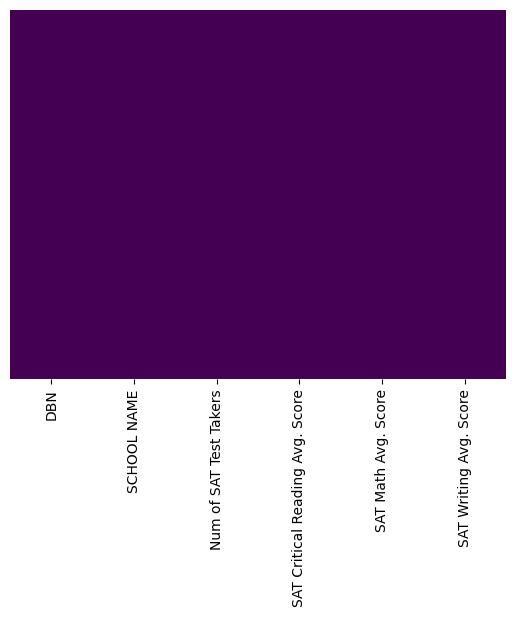

In [90]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [91]:
df_dict = pd.read_excel('SAT Data Set/2012_SAT_Results_Data_Dictionary_.xlsx')

In [92]:
print(df_dict.head())

  Note: Hover over each column header for an explanation of each field.   \
0                                              Order                       
1                                                  1                       
2                                                  2                       
3                                                  3                       
4                                                  4                       

              Unnamed: 1                                         Unnamed: 2  \
0             Field Name                                      Longform Name   
1                    DBN  Unique code use to identify each school in the...   
2            School Name                        Official name of the school   
3  Number of Test Takers  Total number of students sitting SAT from a gi...   
4  Critical Reading Mean  Mean score on the Critical Reading section of SAT   

    Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6               Unnam

In [93]:
unique_records = df.groupby(['DBN', 'SCHOOL NAME']).size().reset_index()

In [94]:
unique_records

,DBN,SCHOOL NAME,0
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,1
3,01M458,FORSYTH SATELLITE ACADEMY,1
4,01M509,MARTA VALLE HIGH SCHOOL,1
...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,1
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,1
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,1
476,79Q950,GED PLUS s CITYWIDE,1


Observations: All the DBN codes are unique with no repetitive value.

In [95]:
print(df.dtypes)

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object


In [96]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
473    False
474    False
475    False
476    False
477    False
Length: 478, dtype: bool

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
for index in df.index:
    if df.loc[index,'Num of SAT Test Takers'] == 's':
        df.drop(index,inplace = True)

In [129]:
df_refined = df
df_refined

,DBN,Name,Num_of_SAT_Test_Takers,SAT_Critical_Reading_Avg_Score,SAT_Math_Avg_Score,SAT_Writing_Avg_Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
466,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350
467,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317,358
471,75Q811,P.S. Q811,32,429,444,433
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


The above code has removed the rows from the original DataFrame where the No. of SAT Test Takers value was not numeric.

In [131]:
df_refined.rename(columns = {'SCHOOL NAME':'Name','Num of SAT Test Takers':'Num_of_SAT_Test_Takers','SAT Critical Reading Avg. Score':'SAT_Critical_Reading_Avg_Score','SAT Math Avg. Score':'SAT_Math_Avg_Score','SAT Writing Avg. Score':'SAT_Writing_Avg_Score'},inplace=True)

In [132]:
df_refined

,DBN,Name,Num_of_SAT_Test_Takers,SAT_Critical_Reading_Avg_Score,SAT_Math_Avg_Score,SAT_Writing_Avg_Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
466,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350
467,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317,358
471,75Q811,P.S. Q811,32,429,444,433
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


# Top 10 schools with maximum number of test takers

In [194]:
df_refined['Num_of_SAT_Test_Takers'] = df_refined.Num_of_SAT_Test_Takers.astype('int')
df_refined['SAT_Critical_Reading_Avg_Score'] = df_refined.SAT_Critical_Reading_Avg_Score.astype('int')
df_refined['SAT_Math_Avg_Score'] = df_refined.SAT_Math_Avg_Score.astype('int')
df_refined['SAT_Writing_Avg_Score'] = df_refined.SAT_Writing_Avg_Score.astype('int')
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 249 to 419
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DBN                             421 non-null    object
 1   Name                            421 non-null    object
 2   Num_of_SAT_Test_Takers          421 non-null    int32 
 3   SAT_Critical_Reading_Avg_Score  421 non-null    int32 
 4   SAT_Math_Avg_Score              421 non-null    int32 
 5   SAT_Writing_Avg_Score           421 non-null    int32 
dtypes: int32(4), object(2)
memory usage: 16.4+ KB


The above set of coded has converted the object values into integer values within the same dataframe

In [211]:
plt.rcParams['figure.figsize'] = (12,8)
df_refined.sort_values(by = ['Num_of_SAT_Test_Takers'],inplace = True,ascending=False)
df_refined

,DBN,Name,Num_of_SAT_Test_Takers,SAT_Critical_Reading_Avg_Score,SAT_Math_Avg_Score,SAT_Writing_Avg_Score
249,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587,659,587
401,26Q430,FRANCIS LEWIS HIGH SCHOOL,934,468,539,467
400,26Q415,BENJAMIN N. CARDOZO HIGH SCHOOL,888,480,545,489
48,02M475,STUYVESANT HIGH SCHOOL,832,679,735,682
363,22K405,MIDWOOD HIGH SCHOOL,824,478,519,476
...,...,...,...,...,...,...
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
112,06M457,GEORGE WASHINGTON YABC,7,394,357,346
399,25Q792,NORTH QUEENS COMMUNITY HIGH SCHOOL,7,379,421,377
147,08X408,HERBERT H. LEHMAN YABC,6,402,373,413


<Axes: xlabel='DBN', ylabel='Num_of_SAT_Test_Takers'>

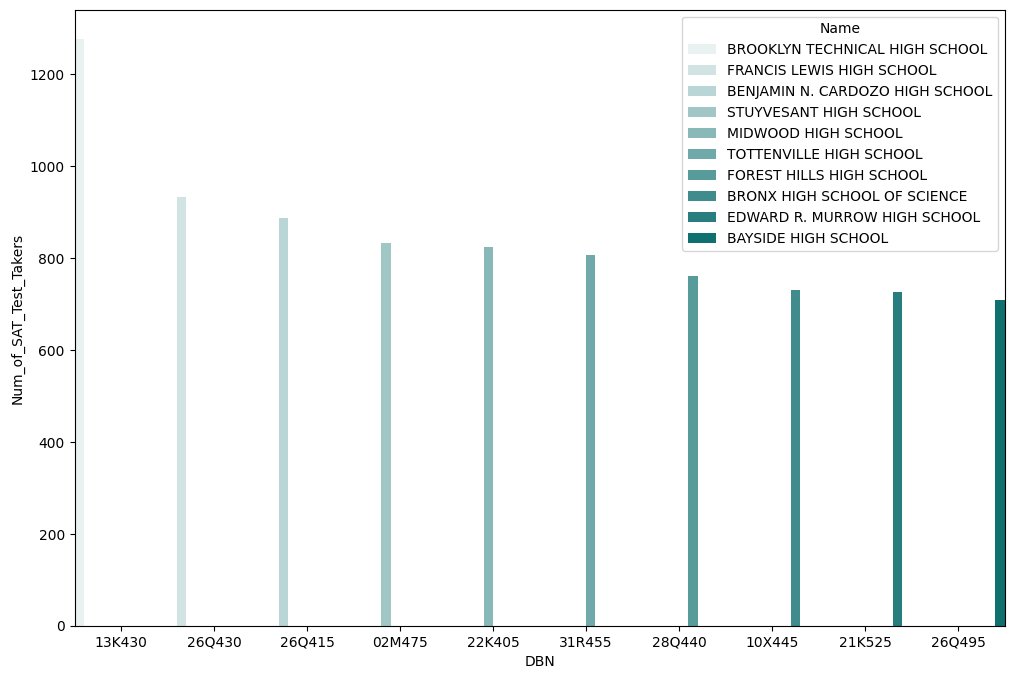

In [205]:
#Plotting a bar graph to depict the Top 10 schools that have maximum test takers.
sns.barplot(x = 'DBN', y = 'Num_of_SAT_Test_Takers', hue = 'Name', width=1,color = 'teal', data = df_refined.iloc[0:10])

### Observations:
    1. The above plot shows that the maximum number of SAT Test Takers in New York are more than 1200 studying in Brooklyn Technical High School.
    2. The remaining top test takers of SAT exam in New York lie within the range of 800 - 1000 students.


<Axes: xlabel='DBN', ylabel='SAT_Critical_Reading_Avg_Score'>

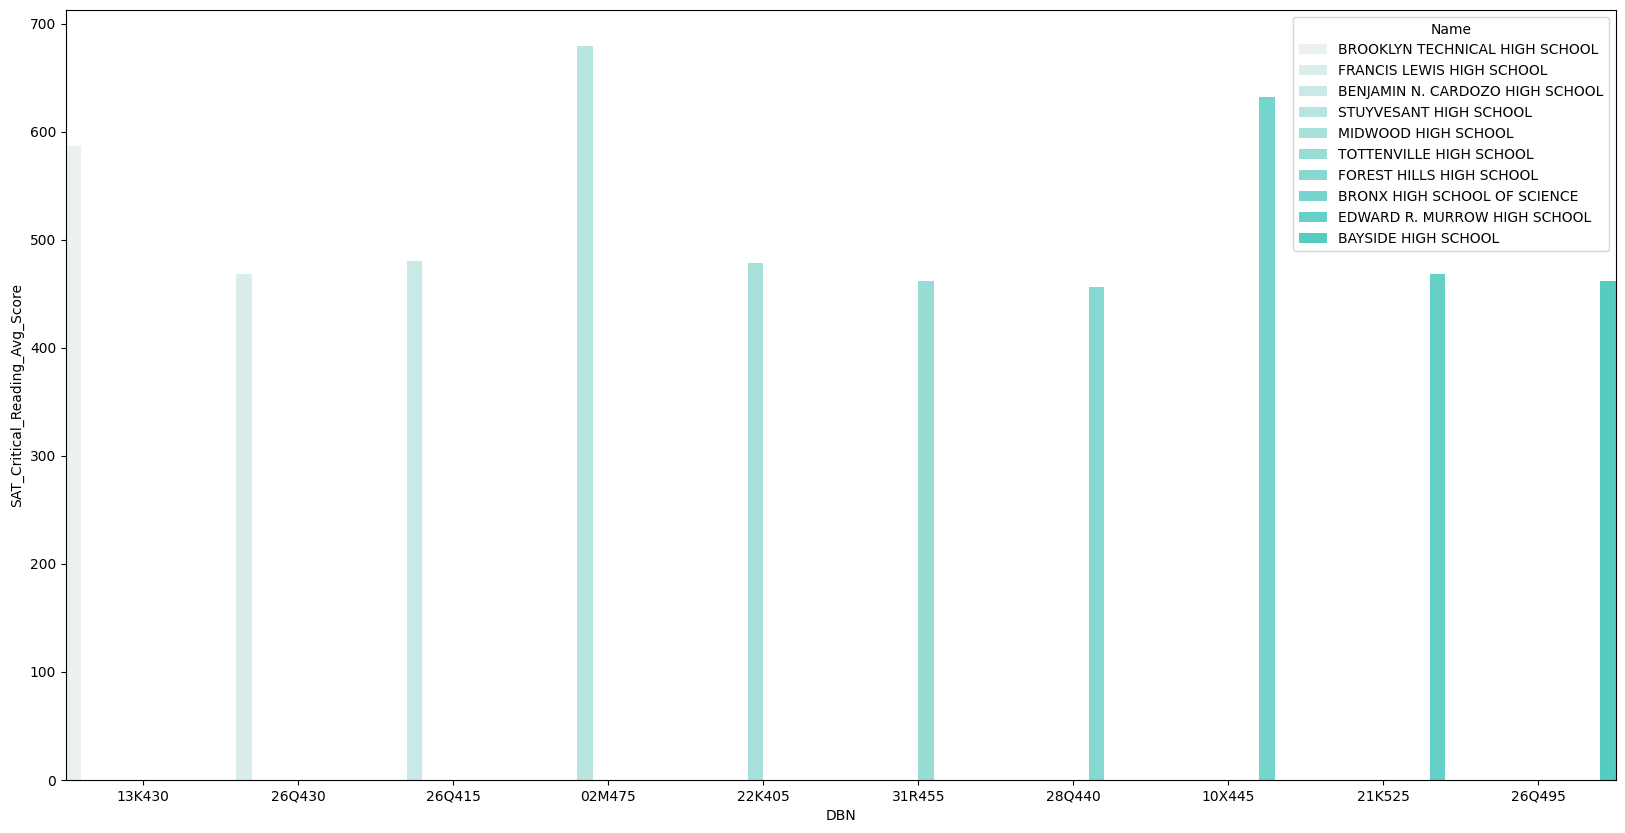

In [209]:
#Plotting a bar graph to depict the maximum average critical reading scores for the Top 10 schools in SAT.
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(x = 'DBN', y = 'SAT_Critical_Reading_Avg_Score', hue = 'Name', width=1,color = 'Turquoise', data = df_refined.iloc[0:10])

### Observations:
    1. The maximum average score in critical reading of almost 680 has been scored by the students of STUYVESANT HIGH SCHOOL amongst the Top 10 ranking schools with highnets number of SAT test taking students.
    2. The second highest average score in critical reading of around 630 has been scored by the students of BRONX HIGH SCHOOL OF SCIENCE which ranks 8th amongst the Top 10 schools with the highest number of test takers.
    3. The school with the top ranking for highest test takers count, has an average score of about 590 in critical reasoning.
    4. Out of 10, only 3 schools have secured an average score of above 500 in critical reasoning in their SAT exams. Remaining schools have secured less an average score of less than or almost equal to 500.

<Axes: xlabel='DBN', ylabel='SAT_Math_Avg_Score'>

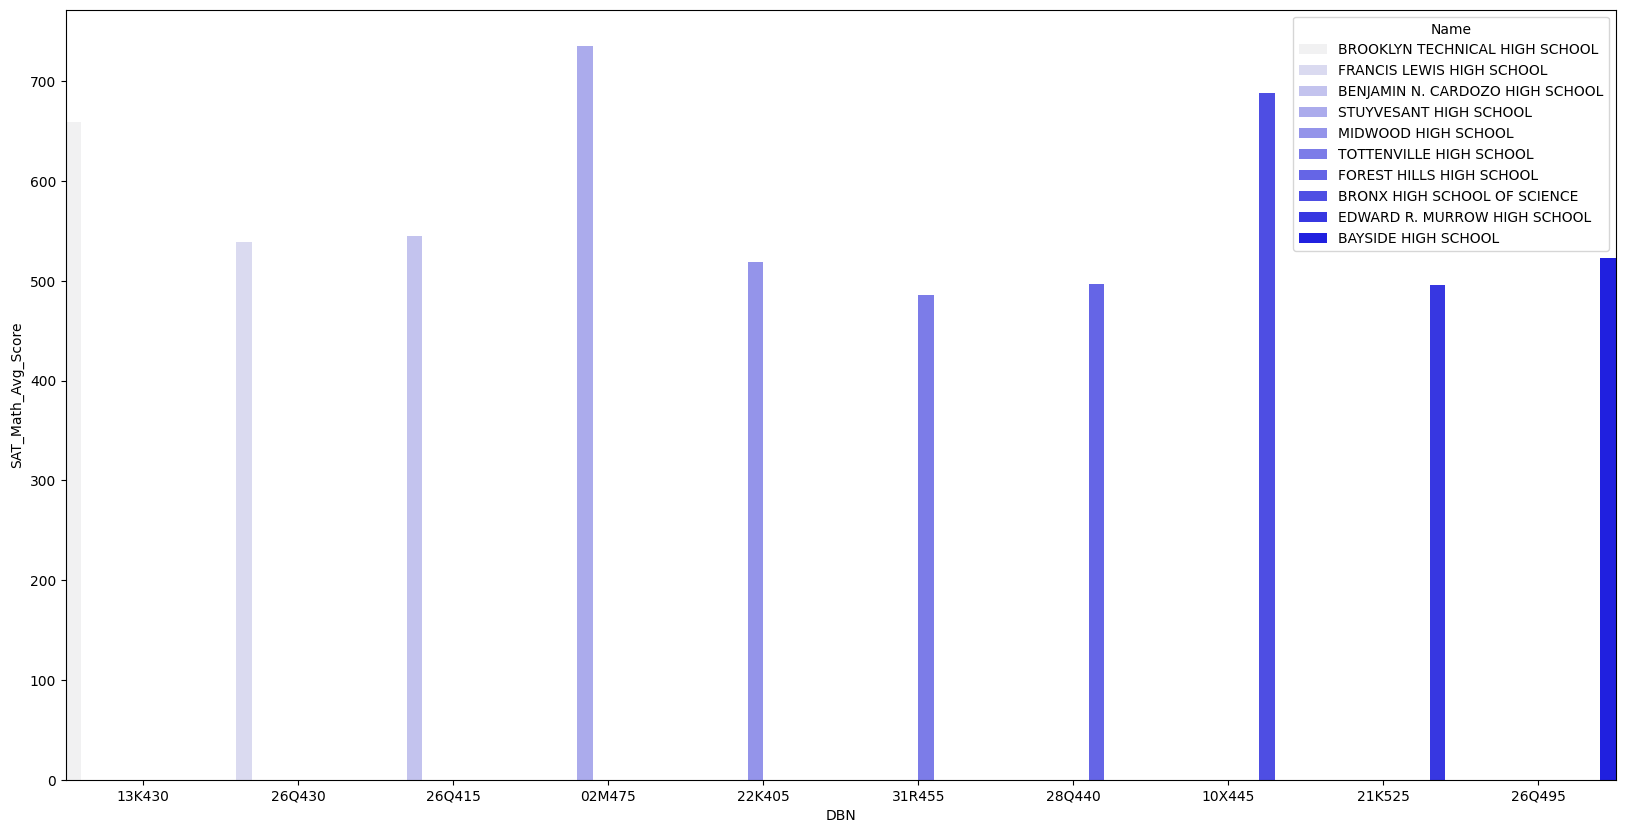

In [215]:
#Plotting a bar graph to depict the maximum average math scores for the Top 10 schools in SAT.
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(x = 'DBN', y = 'SAT_Math_Avg_Score', hue = 'Name', width=1,color = 'Blue', data = df_refined.iloc[0:10])

### Observations:
1. The maximum average score in math of almost 735 has been scored by the students of STUYVESANT HIGH SCHOOL amongst the Top 10 ranking schools with highest number of SAT test taking students.
2. The second highest average score in math of around 700 has been scored by the students of BRONX HIGH SCHOOL OF SCIENCE which ranks 8th amongst the Top 10 schools with the highest number of test takers.
3. The school with the top ranking for highest test takers count, has an average score of about 660 in math.
4. All schools except TOTTENVILLE HIGH SCHOOL have scored an average math score of equal to or more than 500.

<Axes: xlabel='DBN', ylabel='SAT_Writing_Avg_Score'>

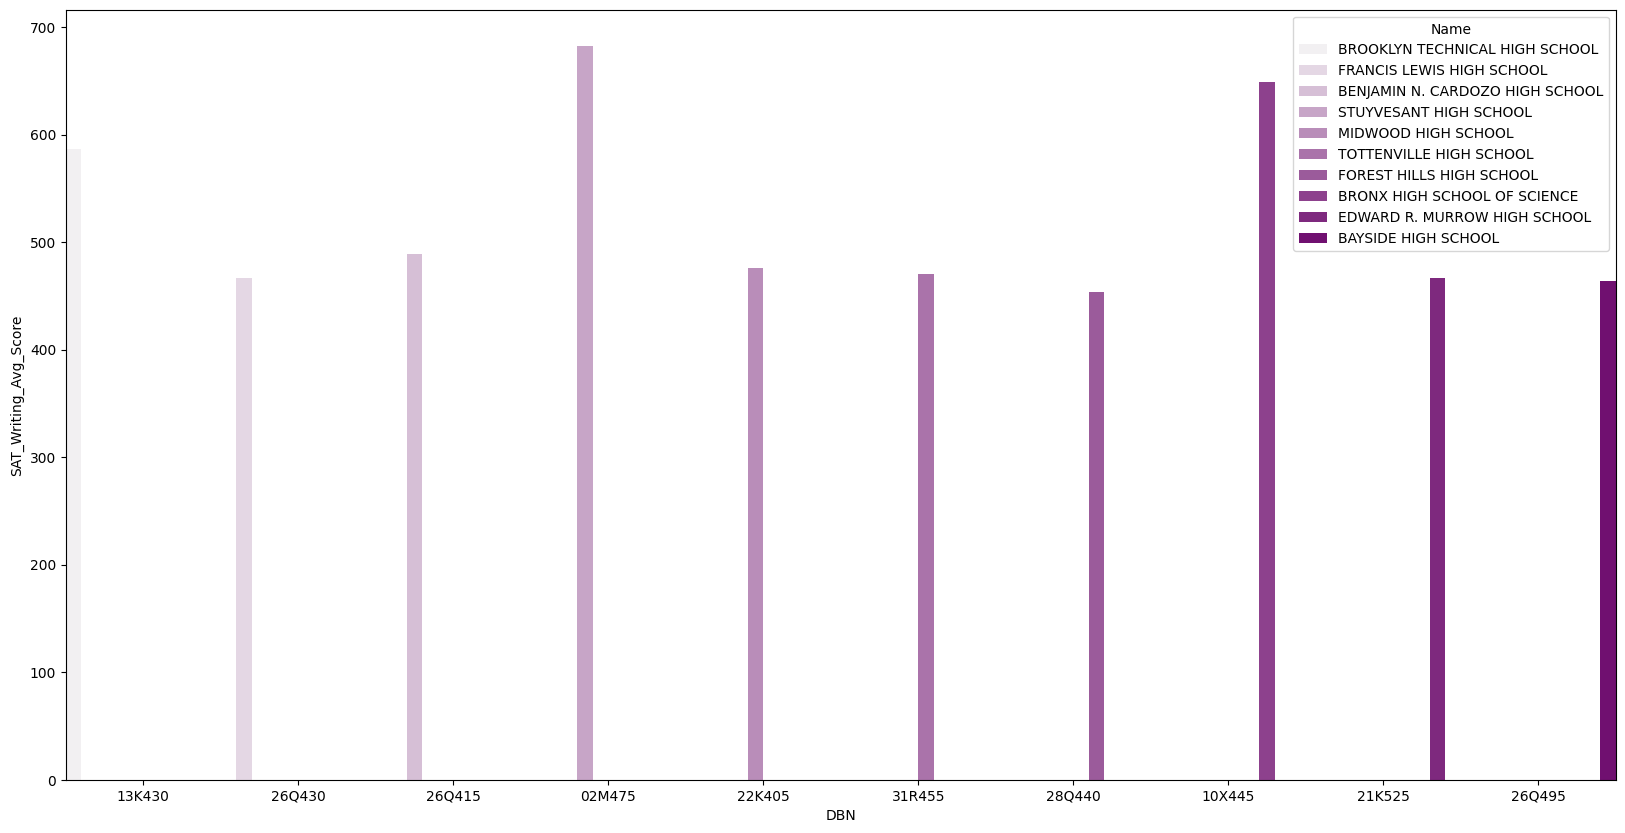

In [218]:
#Plotting a bar graph to depict the maximum average writing scores for the Top 10 schools in SAT.
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(x = 'DBN', y = 'SAT_Writing_Avg_Score', hue = 'Name', width=1,color = 'Purple', data = df_refined.iloc[0:10])

### Observations:
1. The maximum average score in writing of almost 685 has been scored by the students of STUYVESANT HIGH SCHOOL amongst the Top 10 ranking schools with highest number of SAT test taking students.
2. The second highest average score in writing of around 650 has been scored by the students of BRONX HIGH SCHOOL OF SCIENCE which ranks 8th amongst the Top 10 schools with the highest number of test takers.
3. The school with the top ranking for highest test takers count, has an average score of about 590 in writing.
4. Out of 10, only above 3 schools have secured an average score of above 500 in writing in their SAT exams. Remaining schools have secured less an average score of less than or almost equal to 500.

In [226]:
#Plotting a bar graph to depict the maximum average writing scores for the Top 10 schools in SAT.
plt.rcParams['figure.figsize'] = (20,10)
sns.barplot(x = 'DBN', y = ['SAT_Math_Avg_Score','SAT_Writing_Avg_Score'], hue = 'Name', width=1,color = 'Red', data = df_refined)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().